# Ejercicio Práctico
***

La idea aquí es analizar el conjunto de datos, visualizar los datos, aplicar los métodos de selección (o transformación) y aplicar los métodos de clasificación vistos.

## Parte 1: Clasificación sin selección de características

Se entregan dos conjuntos de datos:

- Rostros, es un conjunto de datos con dos clases (cara/no-cara). Este conjunto tiene 264 muestras en total con 1589 características.

- Género, este conjunto tiene 2 clases (female/male), con un total de 610 muestras, cada una con 1589 características calculadas

A desarrollar para cada conjunto de datos:

1. Cargue los archivos de los conjuntos de datos adjuntos (los datos ya están normalizados)
2. Divida el conjunto de datos en 2 subconjuntos: un conjunto con el 80% de las muestras para el entrenamiento (training) y otro con el 20% restante como conjunto de pruebas (testing). 
3. Entrene un clasificador logístico, un clasificador de Bayes Ingenuo, un LDA y QDA y una SVM. 
4. El clasificador debe ser entrenado con los datos de entrenamiento de la partición del punto anterior.
5. Use el conjunto de prueba para evaluar el clasificador: muestre la precisión (accuracy) y la matriz de confusión.


In [1]:
#Importe aquí las bibliotecas necesarias
import scipy.io
%matplotlib inline

import numpy as np    #Para el manejo de arreglos
import pandas as pd   #Para el manejo de conjuntos de datos, tratados como tablas
import seaborn as sns #Para la construcción y visualización de gráficos
import matplotlib.pyplot as plt #Pra la construcción de gráficos

from sklearn import metrics #Las métricas de rendimiento de un clasificador
from sklearn import model_selection #Para el particionamiento de los conjuntos de datos
from sklearn import datasets #Conjuntos de datos predefinidos en sklearn
from sklearn import preprocessing #Nos ayuda a convertir características categóricas a numéricas

from sklearn import naive_bayes #importamos la librería que contiene el clasificador de Bayes
from sklearn import discriminant_analysis  # LDA & QDA
from sklearn import svm  # SVM

# Base de datos Rostros

In [2]:
#Punto 1: Clasificación sin selección de características

#Lea el Conjunto de datos de los rostros
mat = scipy.io.loadmat('datos/set05-face-detection.mat')

y = mat['d'] # Etiquetas de clase de los objetos
X = mat['f'] # Matriz de datos: 300 objetos (filas) x 1643 características (columnas)
Xn = mat['fn'] # Nombres de las características

Ahora particionamos el conjunto de datos en dos partes: una para entrenar y otra para validar

In [3]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=2)

Procedemos a entrenamos el clasificador

## Modelo Logístico

In [4]:
from sklearn.linear_model import LinearRegression # Regresion lineal teórica
from sklearn.linear_model import SGDRegressor #Regregsión lineal uando gradiente descendente estocástico

import math
from sklearn.preprocessing import StandardScaler #Para escalar los datos
from sklearn.linear_model import LogisticRegression #Implementación de la regresión logística

### Entrenamiento del modelo
Ahora procedemos a entrenar el clasificador de regresión logística.

In [5]:
#Especifiamos el modelo a usar
clasificador = LogisticRegression(C=1000, random_state = 0) #Valores pequeños de C especifican mayor regularización

#Entrenamos el modelo
clasificador.fit(X_train, y_train)

C:\Users\Lina\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Lina\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1000, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=0, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

### Validación del modelo
Ahora determinamos que tan bueno es el modelo usando la precisión (accuracy) sobre el conjunto de datos de test.

In [6]:
#Hacemos las predicciones sobre el conjunto de test
y_pred_log = clasificador.predict(X_test)

#Mostramos la cantidad de muestras mal clasificadas 
print('Las muestras mal clasificadas fueron %d' % (y_test != y_pred_log).sum())

Las muestras mal clasificadas fueron 955


In [7]:
#Ahora podemos calcular y ver la precisión del clasificador
acc_log = metrics.accuracy_score(y_test, y_pred_log)
mat_log = metrics.confusion_matrix(y_test, y_pred_log)

print ("Precisión del clasificador: %.2f " %(acc_log*100) )
print ("\n Matriz de Confusión: \n", mat_log)

Precisión del clasificador: 94.34 

 Matriz de Confusión: 
 [[10  1]
 [ 2 40]]


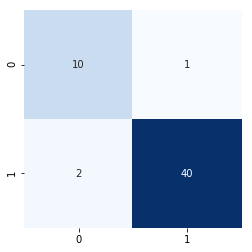

In [8]:
sns.heatmap(mat_log, square=True, annot=True, fmt="d", cbar=False, cmap="Blues")

## Modelo Bayes

In [9]:
nv = naive_bayes.GaussianNB()

#Se entrena el clasificador usando el conjunto de entrenamiento preprocesado
nv.fit(X_train, y_train)

C:\Users\Lina\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB(priors=None, var_smoothing=1e-09)

Finalmente, evaluamos el modelo

Precisión del clasificador: 90.57 

Matriz de Confusión: 
 [[11  0]
 [ 5 37]]


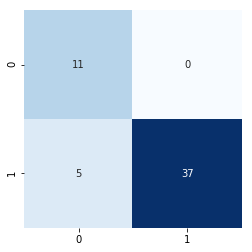

In [10]:
#Predecir la clase del conjunto de test
y_pred_bayes = nv.predict(X_test)

#Calcule la precisión y muestre la matriz de confusión
acc_bayes = metrics.accuracy_score(y_test, y_pred_bayes)
mat_bayes = metrics.confusion_matrix(y_test, y_pred_bayes)

print ("Precisión del clasificador: %.2f " %(acc_bayes*100.0) )
print ("\nMatriz de Confusión: \n", mat_bayes)


#Esta es otra forma de ver la matriz de confusión
sns.heatmap(mat_bayes, square=True, annot=True, fmt="d", cbar=False, cmap="Blues")

## Modelo LDA y QDA

Entrenamos los modelos

In [11]:
# Número de muestras y de características
n_samples, n_features = X.shape

In [12]:
# Visualicemos la matriz de datos y el vector
print("Número de Objetos: ", n_samples)
print("Número de Características: ", n_features)

Número de Objetos:  264
Número de Características:  1589


In [13]:
#Especificamos los modelos a usar LDA y QDA
lda = discriminant_analysis.LinearDiscriminantAnalysis()
qda = discriminant_analysis.QuadraticDiscriminantAnalysis()

# Entrenamos los modelos
lda.fit(X_train, y_train)
qda.fit(X_train, y_train)

C:\Users\Lina\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Lina\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\Lina\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Lina\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:692: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\Lina\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:692: UserWarning: Variables are collinear
  warnings.warn("Variables are co

QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
               store_covariance=False, store_covariances=None, tol=0.0001)

 Medimos la precisión de los modelos en el conjunto de test

Precisión del clasificador LDA: 90.57 


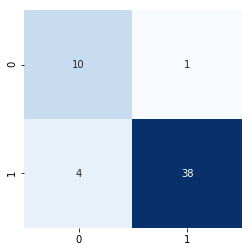

In [14]:
#Predecimos la clase del conjunto de test
y_pred_lda = lda.predict(X_test)
acc_lda = metrics.accuracy_score(y_test, y_pred_lda)
mat_lda = metrics.confusion_matrix(y_test, y_pred_lda)

y_pred_qda = qda.predict(X_test)
acc_qda = metrics.accuracy_score(y_test, y_pred_qda)
mat_qda = metrics.confusion_matrix(y_test, y_pred_qda)

print ("Precisión del clasificador LDA: %.2f " %(acc_lda*100.0) )
#ax1 = plt.axes()
sns.heatmap(mat_lda, square=True, annot=True, fmt="d", cbar=False, cmap="Blues")#, xticklabels=clases, yticklabels=clases, ax = ax1)
#ax1.set_title('Matriz de Confusión LDA')
#plt.show()



Precisión del clasificador QDA: 84.91 


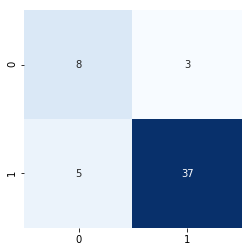

In [15]:
print ("\n\nPrecisión del clasificador QDA: %.2f " %(acc_qda*100.0) )
#ax2 = plt.axes()
sns.heatmap(mat_qda, square=True, annot=True, fmt="d", cbar=False, cmap="Blues")#, xticklabels=clases, yticklabels=clases, ax = ax2)
#ax2.set_title('Matriz de Confusión LDA:')
#plt.show()

## Modelo SVM
Entrenamos los modelos
En este caso entrenamos 3 svm's distintas:

* Una SVM Lineal
* Una SVM de base Radial y
* Una SVM Polinomial

In [16]:
#Especificamos los modelos a usar - SVM Lineal
svm_lineal = svm.SVC(kernel='linear', C=1.0, random_state=0)
svm_rbf = svm.SVC(kernel='rbf', C=1.0, random_state=0)
svm_poly = svm.SVC(kernel='poly', C=1.0, random_state=0)

# Entrenamos los modelos
svm_lineal.fit(X_train, y_train)
svm_rbf.fit(X_train, y_train)
svm_poly.fit(X_train, y_train)

C:\Users\Lina\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Lina\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Lina\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Lina\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please ch

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='poly', max_iter=-1, probability=False, random_state=0,
  shrinking=True, tol=0.001, verbose=False)

### Medimos la precisión de los modelos en el conjunto de test
Medimos la precisión y mostramos las matrices de confusión de los 3 modelos

Precisión del clasificador Lineal: 96.23 
Precisión del clasificador Radial: 79.25 
Precisión del clasificador Polinomial: 88.68 


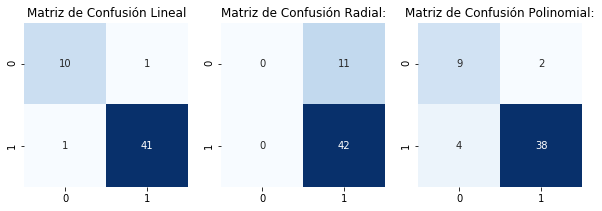

In [17]:
#Predecimos la clase del conjunto de test
y_pred_lineal = svm_lineal.predict(X_test)
acc_lineal = metrics.accuracy_score(y_test, y_pred_lineal)
mat_lineal = metrics.confusion_matrix(y_test, y_pred_lineal)

f,(ax1,ax2,ax3) = plt.subplots(1,3, figsize=(10,30))

print ("Precisión del clasificador Lineal: %.2f " %(acc_lineal*100.0) )
ax1 = sns.heatmap(mat_lineal, square=True, annot=True, fmt="d", cbar=False, cmap="Blues", ax = ax1)
ax1.set_title('Matriz de Confusión Lineal')

y_pred_rbf = svm_rbf.predict(X_test)
acc_rbf = metrics.accuracy_score(y_test, y_pred_rbf)
mat_rbf = metrics.confusion_matrix(y_test, y_pred_rbf)

print ("Precisión del clasificador Radial: %.2f " %(acc_rbf*100.0) )
ax2 = sns.heatmap(mat_rbf, square=True, annot=True, fmt="d", cbar=False, cmap="Blues", ax = ax2)
ax2.set_title('Matriz de Confusión Radial:')

y_pred_poly = svm_poly.predict(X_test)
acc_poly = metrics.accuracy_score(y_test, y_pred_poly)
mat_poly = metrics.confusion_matrix(y_test, y_pred_poly)

print ("Precisión del clasificador Polinomial: %.2f " %(acc_poly*100.0) )
ax3 = sns.heatmap(mat_poly, square=True, annot=True, fmt="d", cbar=False, cmap="Blues", ax = ax3)
ax3.set_title('Matriz de Confusión Polinomial:')

plt.show()

# Base de datos Género

In [18]:
#Punto 1: Clasificación sin selección de características

#Lea el Conjunto de datos de los genero
mat_g = scipy.io.loadmat('datos/set06-gender.mat')

y_g = mat_g['d'] # Etiquetas de clase de los objetos
X_g = mat_g['f'] # Matriz de datos: 300 objetos (filas) x 1643 características (columnas)
Xn_g = mat_g['fn'] # Nombres de las características

Ahora particionamos el conjunto de datos en dos partes: una para entrenar y otra para validar

In [19]:
X_g_train, X_g_test, y_g_train, y_g_test = model_selection.train_test_split(X_g, y_g, test_size=0.2, random_state=2)

## Modelo Logístico

In [20]:
from sklearn.linear_model import LinearRegression # Regresion lineal teórica
from sklearn.linear_model import SGDRegressor #Regregsión lineal uando gradiente descendente estocástico
import math
from sklearn.preprocessing import StandardScaler #Para escalar los datos
from sklearn.linear_model import LogisticRegression #Implementación de la regresión logística

Entrenamiento del modelo
Ahora procedemos a entrenar el clasificador de regresión logística.

In [21]:
#Especifiamos el modelo a usar
clasificador_g = LogisticRegression(C=1000, random_state = 0) #Valores pequeños de C especifican mayor regularización

In [22]:
#Entrenamos el modelo
clasificador_g.fit(X_g_train, y_g_train)

C:\Users\Lina\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Lina\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Lina\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LogisticRegression(C=1000, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=0, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

## Validación del modelo

Ahora determinamos que tan bueno es el modelo usando la precisión (accuracy) sobre el conjunto de datos de test.

In [23]:
#Hacemos las predicciones sobre el conjunto de test
y_g_pred_log = clasificador_g.predict(X_g_test)

#Mostramos la cantidad de muestras mal clasificadas 
print('Las muestras mal clasificadas fueron %d' % (y_g_test != y_g_pred_log).sum())

Las muestras mal clasificadas fueron 6644


In [24]:
#Ahora podemos calcular y ver la precisión del clasificador
acc_g_log = metrics.accuracy_score(y_g_test, y_g_pred_log)
mat_g_log = metrics.confusion_matrix(y_g_test, y_g_pred_log)

print ("Precisión del clasificador: %.2f " %(acc_g_log*100) )
print ("\n Matriz de Confusión: \n", mat_g_log)

Precisión del clasificador: 93.44 

 Matriz de Confusión: 
 [[77  5]
 [ 3 37]]


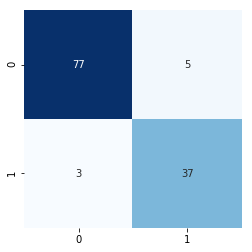

In [25]:
sns.heatmap(mat_g_log, square=True, annot=True, fmt="d", cbar=False, cmap="Blues")

## Modelo Bayes

In [26]:
nv_g = naive_bayes.GaussianNB()

#Se entrena el clasificador usando el conjunto de entrenamiento preprocesado
nv_g.fit(X_g_train, y_g_train)

C:\Users\Lina\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB(priors=None, var_smoothing=1e-09)

Finalmente, evaluamos el modelo

Precisión del clasificador: 67.21 

Matriz de Confusión: 
 [[51 31]
 [ 9 31]]


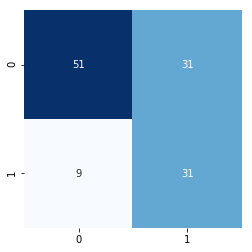

In [27]:
#Predecir la clase del conjunto de test
y_g_pred_bayes = nv_g.predict(X_g_test)

#Calcule la precisión y muestre la matriz de confusión
acc_g_bayes = metrics.accuracy_score(y_g_test, y_g_pred_bayes)
mat_g_bayes = metrics.confusion_matrix(y_g_test, y_g_pred_bayes)

print ("Precisión del clasificador: %.2f " %(acc_g_bayes*100.0) )
print ("\nMatriz de Confusión: \n", mat_g_bayes)


#Esta es otra forma de ver la matriz de confusión
sns.heatmap(mat_g_bayes, square=True, annot=True, fmt="d", cbar=False, cmap="Blues")

## Modelo LDA y QDA

Entrenamos los modelos

In [28]:
# Número de muestras y de características
n_g_samples, n_g_features = X_g.shape

In [29]:
# Visualicemos la matriz de datos y el vector
print("Número de Objetos: ", n_g_samples)
print("Número de Características: ", n_g_features)

Número de Objetos:  610
Número de Características:  1589


In [30]:
#Especificamos los modelos a usar LDA y QDA
lda_g = discriminant_analysis.LinearDiscriminantAnalysis()
qda_g = discriminant_analysis.QuadraticDiscriminantAnalysis()

# Entrenamos los modelos
lda_g.fit(X_g_train, y_g_train)
qda_g.fit(X_g_train, y_g_train)

C:\Users\Lina\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Lina\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\Lina\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Lina\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:692: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\Lina\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:692: UserWarning: Variables are collinear
  warnings.warn("Variables are co

QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
               store_covariance=False, store_covariances=None, tol=0.0001)

Medimos la precisión de los modelos en el conjunto de test

Precisión del clasificador LDA: 96.72 


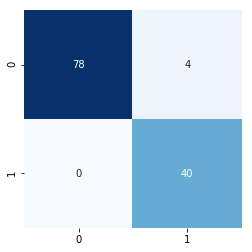

In [31]:
#Predecimos la clase del conjunto de test
y_g_pred_lda = lda_g.predict(X_g_test)
acc_g_lda = metrics.accuracy_score(y_g_test, y_g_pred_lda)
mat_g_lda = metrics.confusion_matrix(y_g_test, y_g_pred_lda)

y_g_pred_qda = qda_g.predict(X_g_test)
acc_g_qda = metrics.accuracy_score(y_g_test, y_g_pred_qda)
mat_g_qda = metrics.confusion_matrix(y_g_test, y_g_pred_qda)

print ("Precisión del clasificador LDA: %.2f " %(acc_g_lda*100.0) )
#ax1 = plt.axes()
sns.heatmap(mat_g_lda, square=True, annot=True, fmt="d", cbar=False, cmap="Blues")#, xticklabels=clases, yticklabels=clases, ax = ax1)
#ax1.set_title('Matriz de Confusión LDA')
#plt.show()



Precisión del clasificador QDA: 68.85 


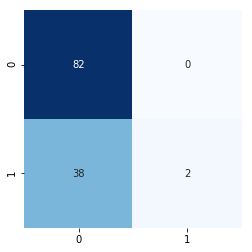

In [32]:
print ("\n\nPrecisión del clasificador QDA: %.2f " %(acc_g_qda*100.0) )
#ax2 = plt.axes()
sns.heatmap(mat_g_qda, square=True, annot=True, fmt="d", cbar=False, cmap="Blues")#, xticklabels=clases, yticklabels=clases, ax = ax2)
#ax2.set_title('Matriz de Confusión LDA:')
#plt.show()

## Modelo SVM

Entrenamos los modelos En este caso entrenamos 3 svm's distintas:

* Una SVM Lineal
* Una SVM de base Radial y
* Una SVM Polinomial

In [33]:
#Especificamos los modelos a usar - SVM Lineal
svm_g_lineal = svm.SVC(kernel='linear', C=1.0, random_state=0)
svm_g_rbf = svm.SVC(kernel='rbf', C=1.0, random_state=0)
svm_g_poly = svm.SVC(kernel='poly', C=1.0, random_state=0)

# Entrenamos los modelos
svm_g_lineal.fit(X_g_train, y_g_train)
svm_g_rbf.fit(X_g_train, y_g_train)
svm_g_poly.fit(X_g_train, y_g_train)

C:\Users\Lina\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Lina\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Lina\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Lina\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please ch

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='poly', max_iter=-1, probability=False, random_state=0,
  shrinking=True, tol=0.001, verbose=False)

### Medimos la precisión de los modelos en el conjunto de test

Medimos la precisión y mostramos las matrices de confusión de los 3 modelos

Precisión del clasificador Lineal: 94.26 
Precisión del clasificador Radial: 67.21 
Precisión del clasificador Polinomial: 96.72 


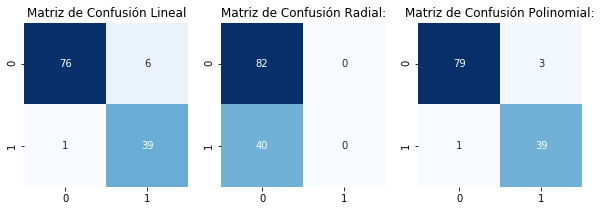

In [34]:
#Predecimos la clase del conjunto de test
y_g_pred_lineal = svm_g_lineal.predict(X_g_test)
acc_g_lineal = metrics.accuracy_score(y_g_test, y_g_pred_lineal)
mat_g_lineal = metrics.confusion_matrix(y_g_test, y_g_pred_lineal)

f,(ax1,ax2,ax3) = plt.subplots(1,3, figsize=(10,30))

print ("Precisión del clasificador Lineal: %.2f " %(acc_g_lineal*100.0) )
ax1 = sns.heatmap(mat_g_lineal, square=True, annot=True, fmt="d", cbar=False, cmap="Blues", ax = ax1)
ax1.set_title('Matriz de Confusión Lineal')

y_g_pred_rbf = svm_g_rbf.predict(X_g_test)
acc_g_rbf = metrics.accuracy_score(y_g_test, y_g_pred_rbf)
mat_g_rbf = metrics.confusion_matrix(y_g_test, y_g_pred_rbf)

print ("Precisión del clasificador Radial: %.2f " %(acc_g_rbf*100.0) )
ax2 = sns.heatmap(mat_g_rbf, square=True, annot=True, fmt="d", cbar=False, cmap="Blues", ax = ax2)
ax2.set_title('Matriz de Confusión Radial:')

y_g_pred_poly = svm_g_poly.predict(X_g_test)
acc_g_poly  = metrics.accuracy_score(y_g_test, y_g_pred_poly)
mat_g_poly = metrics.confusion_matrix(y_g_test, y_g_pred_poly)

print ("Precisión del clasificador Polinomial: %.2f " %(acc_g_poly*100.0) )
ax3 = sns.heatmap(mat_g_poly, square=True, annot=True, fmt="d", cbar=False, cmap="Blues", ax = ax3)
ax3.set_title('Matriz de Confusión Polinomial:')

plt.show()

## Parte 2: Clasificación con selección de características

1. Sobre el conjunto de entrenamiento, aplique un método de selección y un método de extracción (o transformación) para seleccionar las 5, 25 y 50 mejores características del conjunto de datos.
2. En total usted cuenta con 6 conjuntos de datos de entrenamiento, 3 de la selección y 3 de la transformación.
3. Visualice y analice los dos conjuntos de datos que obtuvo de 5 características. Haga sus comentarios respecto a lo que puede visualizar.
4. Con cada conjunto de entrenamiento, entrene los mismos clasificadores de la parte 1.
5. Filtre el conjunto de datos de prueba y genere los 6 conjuntos correspondientes.
6. Evalúe los clasificadores con base en la precisión (accuracy) y la matriz de confusión.
7. Compare estos resultados con los clasificadores de la parte anterior. Que hallazgos hay?